In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# importing data science csv using pandas dataframe
df_data_science=pd.read_csv('https://cocl.us/datascience_survey_data', index_col=0)

In [3]:
df_data_science.shape

(6, 3)

In [4]:
df_data_science

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


#### Use the artist layer of Matplotlib to replicate the bar chart below to visualize the percentage of the respondents' interest in the different data science topics surveyed.

In [5]:
# Step 1: Sort the dataframe in descending order of Very interesting
df_data_science.sort_values(by=['Very interested'], ascending=False, inplace=True)

In [6]:
df_data_science

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [7]:
# Step 2: Convert the numbers into percentages of the total number of respondents. 
# Recall that 2,233 respondents completed the survey. Round percentages to 2 decimal places.
total_response=2233
df_data_science=df_data_science.divide(total_response)
df_data_science=df_data_science.round(2)

In [8]:
df_data_science

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,0.76,0.20,0.03
Machine Learning,0.73,0.21,0.03
Data Visualization,0.60,0.33,0.05
Big Data (Spark / Hadoop),0.60,0.33,0.06
Deep Learning,0.57,0.34,0.06
Data Journalism,0.19,0.48,0.27


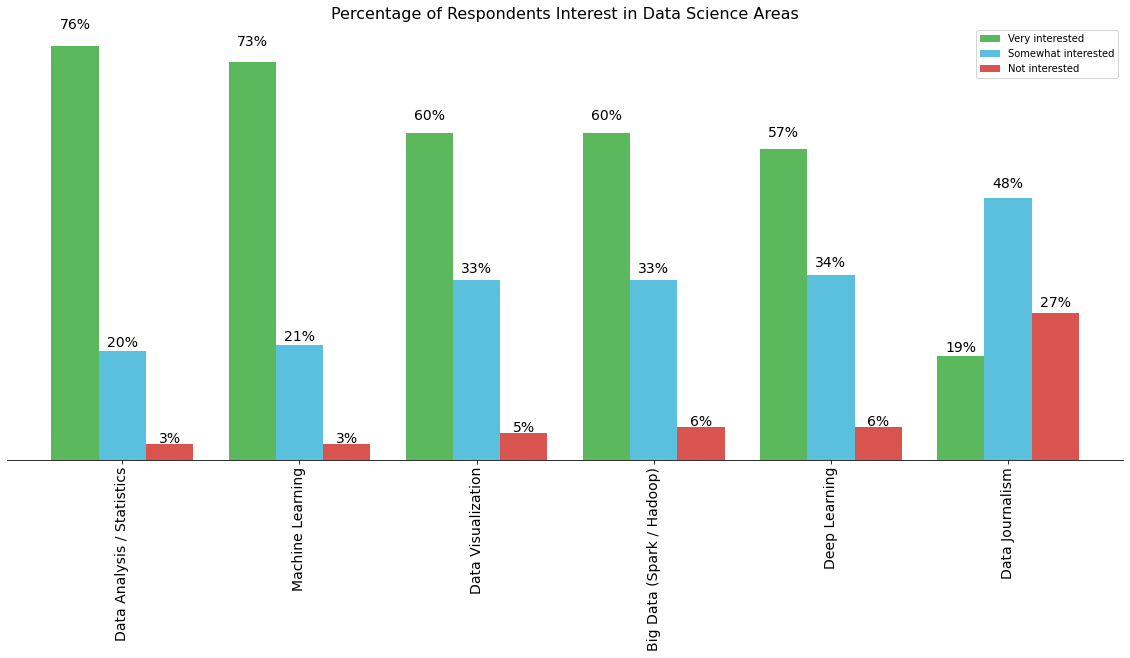

In [9]:
# Step 3: As for the chart: 
#use a figure size of (20, 8), bar width of 0.8,
# use color #5cb85c for the Very interested, #5bc0de for the Somewhat interested and #d9534f for the Not interested
# use font size 14 for the bar labels, percentages, and legend,
ax=df_data_science.plot(kind='bar', figsize=(20,8), width=0.8, color=('#5cb85c', '#5bc0de', '#d9534f'), fontsize=14)

# use font size 16 for the title
ax.set_title('Percentage of Respondents Interest in Data Science Areas', fontsize=16)

# and remove the left, top, and right borders.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# to remove the values from y axis
ax.get_yaxis().set_ticks([]) # empty list means there is no ticks set

# display the percentages above the bars as shown above
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() #The bottom and left rectangle coordinates x: starting point, y: end point
    ax.annotate('{:.0%}'.format(height), xy=(x + width/2, height*1.04), ha='center', fontsize=14)

# Create a Choropleth map to visualize crime in San Francisco.

In [51]:
# Crime data of San Francisco
df_sanfran_crime=pd.read_csv('sanfran_crime_dataset.csv', index_col=6)
df_sanfran_crime.drop(columns=['Category','Descript','DayOfWeek','Date','Time','Resolution','Address','Location', 'PdId', 'X','Y'], 
                      inplace=True)

In [52]:
df_sanfran_crime.head()

,IncidntNum
PdDistrict,
SOUTHERN,120058272
SOUTHERN,120058272
BAYVIEW,141059263
TENDERLOIN,160013662
MISSION,160002740


### Total number of crimes in each neighborhood.

In [66]:
df_sanfran_refined=df_sanfran_crime.groupby(by='PdDistrict').count()

In [67]:
df_sanfran_refined.reset_index(inplace=True)
df_sanfran_refined.rename(columns={'PdDistrict':'Neighborhood', 'IncidntNum':'# of Crimes'}, inplace=True)

In [68]:
df_sanfran_refined

,Neighborhood,# of Crimes
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


### Creating the visualization now

In [91]:
import folium
gjson = r'https://cocl.us/sanfran_geojson'
sf_map = folium.Map(location = [37.77, -122.42], zoom_start = 12)

In [92]:
sf_map.choropleth(geo_data=gjson, data=df_sanfran_refined, columns=['Neighborhood', '# of Crimes'], 
                  key_on='feature.properties.DISTRICT', fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.2,
                  legend_name='Crime Rate in San Francisco',reset=True)

SSLError: HTTPSConnectionPool(host='public.boxcloud.com', port=443): Max retries exceeded with url: /d/1/b1!h1iIIujXoj0T46xJyJ83AWAxs6YSVZhJgKPJBiAr_lv-3o5ysBozeNWDaK6l5V7V6ude-ojVV6ov4p6ur5NBdIYR6aU1ajijehLPJ8wmxZdBoCTOCEh8D8LmpDB_JdO1R2OmLgH0Rb2udN12yoGi_zN7FfntY6XmUsUMDVlo9dqV19H27gGT_74DXfs5-UmC-uGQ6uhnOFlnSb3_NfwBFgnUS5NzBTlRPWhgzH-oNkb0y5V3q0TpnCUcavgg3zrJQHzPietvFjADHuhtM1661ZRZr-JyRyhTSRIuzX9wdElC4BSeuuYjaXybqD8vCXFo1c5dv8EX96jIdyalEP4tDfDdmx2aVILuCMt_MOULuS8bR6Fa3NVwQudJdPZnVSUqsKsn6Gaad8x5dBPn9JoH3azStM7_suO8zzNd2OOrUgDqJ2tKw0dmRcHBe6xGu_VipBHdsSsJNZGsvLTxcNQ-4ioZZ_JRKPg5f1Qxnqr2ChHNXWOy0mBuXsrKIcByzvYtAHBv3YDr4efTZozGOqooE4PSQdNt1gRDgF9NOUXuLVhc3MkPeie46gh84pmRUKyPzJZAEVoEmexWd9tAVF9Q3UYLjXGwz2Vqad9qgysczUrPi26QCJhDFnaPeWHxsEd3w_n2685zNK9DmKu1DaHHB7wzocqPbqrHUu3sR2KVdkMeqjUu9xYzgRnrKVLJcgztZD7gHdquf_SEcWpx1-t-Ofoxua6nnY3_4Rv-wEHSkTuXUQqLP8kzxEzhp_0b-5uoO3lXoW6zbuZDO5nmcrCI-qXj8EM4Fs2PRizmhVJScdhAZ_-GOOBh3Z3wHZ2treFlf1Jw54L7AwjgaJUFCLswLrXv2WTuj_xNY1WdpKM8aGWNufc6dIhEyvur0GYfBbr7DuB5Bj1SR5eZGZxP0illJ0DO-uy3I3496yZEBgiZSmUJVL_rnZjUqI4fW7ctIs28cXolQCGDmwQyTtcJFR67lLMAiMdaY2T9RtA6eNsbkmDTaMpkZCGgLAXs7Pw66bZo71BLvhClFCyJpehhAkV6P8Tidpl1XoWX17nbYPZY6KzpZtUyRBUZ3USJsi5OFIuWGMM4ytf23mVgNfOv50jwszR-zEea8wugnDqB0cVEK-7L1kzup06uCiCn1JP9DMObMqbkbRvuLXXHUptaeq6hJcvyyBd_6ADqCL7TN1rJnRJNJUBCYAIubuNwHJv77mkBjd9ptSQ4WNcTjWrKFF7o28MmHBaeHpo0gg_wc-u37vJgE901foPfdo9RRVBAc6pTPwIJGKUFqCmvtkWYPwYU1Z2wcOPR6eYcRo4EAALHUUkxdTpXCKqel4SqnbWFtyAwiecdu4nZwhxNzpn7m1v6YZmKgZZUY9O6cGWsbRYhnTylgTcfObr5ZWKfl1P-Tsl7fOTyZbEdzTmHk0Fxva5zor837Xz1OIBcRmCc4icAUK1RO5jWtf0Ek1pjBMAuqtwt/download (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1108)')))